# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib as mpl

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Get the number of data points from the city types
sum(city_data_df["type"]=="Urban")
sum(city_data_df["type"]=="Suburban")
sum(city_data_df["type"]=="Rural")

# Get the columns and the rows that are not null
ride_data_df.isnull().sum()

# Get the data types of each columns
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

# Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
# Create a DataFrame for each City Type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

# Get the ride count, average fare, and average drivers for rural city type.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities_df.groupby(['city']).mean()["fare"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

# Get the ride count, average fare, average drivers for suburban city type.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

# Get the ride count, average fare, average drivers for urban city type.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

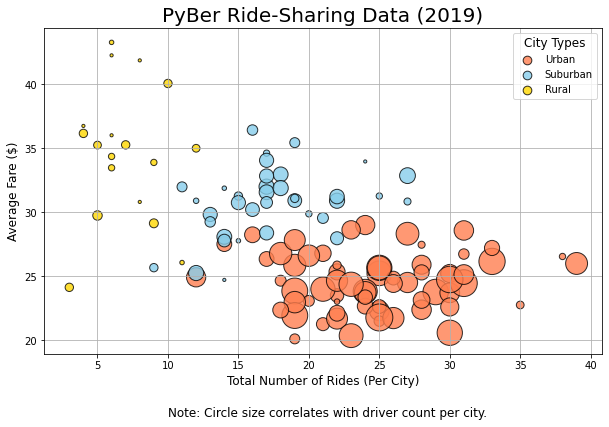

In [4]:
# Build a scatter plot with average fare vs total numbers of rides per city type
fig, ax = plt.subplots(figsize=(10,6))

# Add the scatter charts for each type of city.
ax.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")
ax.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")
ax.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c="gold", edgecolor="black", linewidths=1, alpha=0.8, label="Rural")

# Incorporate the other graph properties
ax.set_title("PyBer Ride-Sharing Data (2019)", fontsize=20)
ax.set_ylabel("Average Fare ($)", fontsize=12)
ax.set_xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create and plot legend
lgnd = plt.legend(mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
ax.text(10,14,"Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/PyBer_RideSharing_Data.png", bbox_inches='tight')

In [5]:
# Get the fares for each city type.
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

# Get the driver count data from each city types.
urban_drivers = urban_cities_df["driver_count"]
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

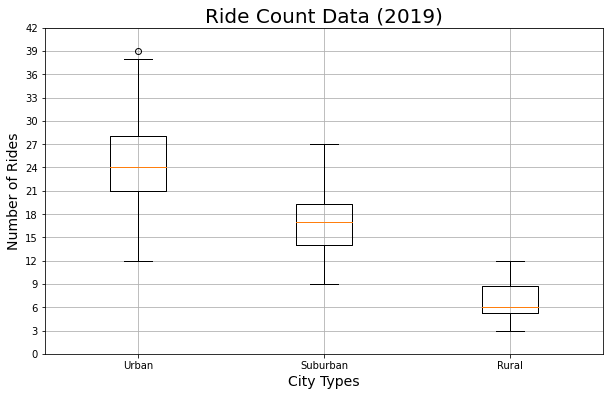

In [7]:
# Graph all ride count box-and-whisker plots to the same graph.
x_labels= ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

#Save the figure.
plt.savefig("analysis/Ride_Count_Data.png", transparent=False, facecolor='w', bbox_inches='tight')

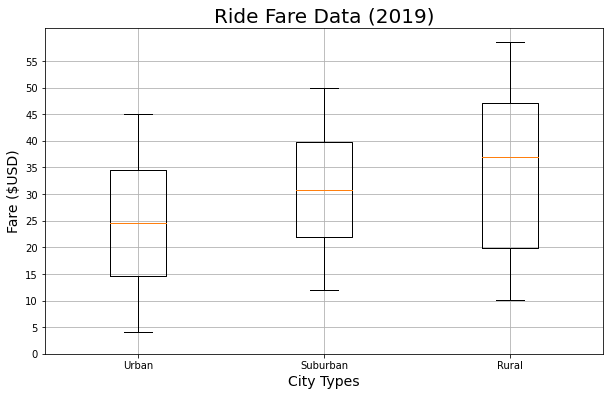

In [8]:
# Graph all box-and-whisker plots each city types ride fare data.
x_labels= ["Urban", "Suburban", "Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare ($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Ride_Fare_Data.png", transparent=False, facecolor='w', bbox_inches='tight')

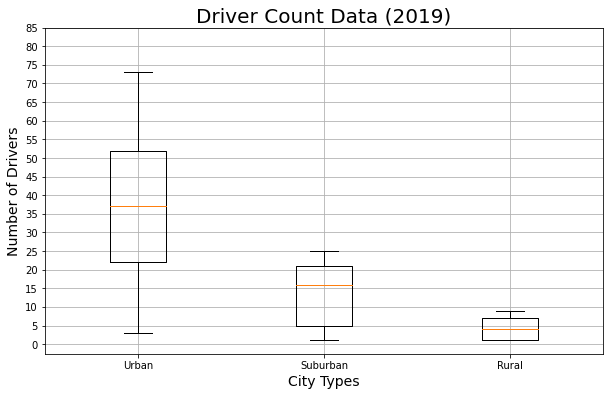

In [9]:
# Graph all box-and-whisker plots each city types driver count data.
x_labels = ["Urban", "Suburban", "Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(driver_count_data, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Driver_Count_Data.png", transparent=False, facecolor='w', bbox_inches='tight')

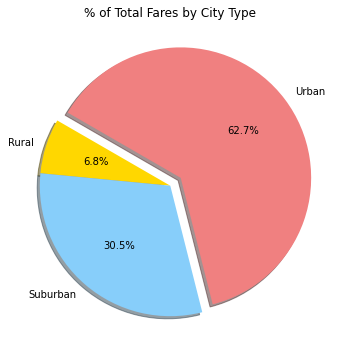

In [10]:
# Calculate the percentage of fare for each city type
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()

# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1], autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] =14

# Save Figure
plt.savefig("analysis/Percent_Total_Fares.png", transparent=False, facecolor='w', bbox_inches='tight')

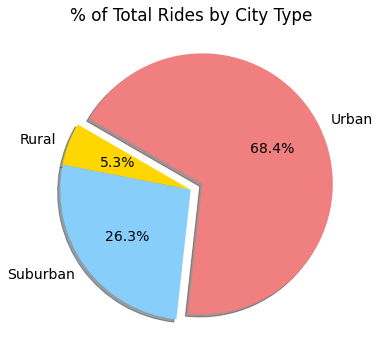

In [12]:
# Calculate the percentage rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()

# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents, labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1], autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Change the default font size from 10 to 14
mpl.rcParams['font.size'] = 14

# Save and Show Figure
plt.savefig("analysis/Percent_Total_Rides.png", transparent=False, facecolor='w', bbox_inches='tight')

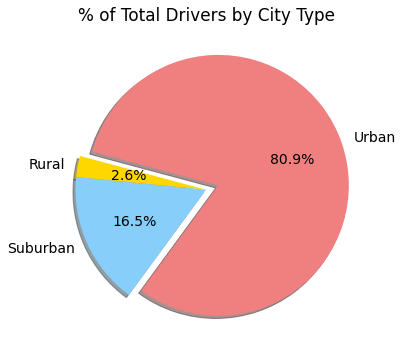

In [14]:
# Calculate the percentage of drivers for each city type
driver_percentage = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()

# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percentage, labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1], autopct='%1.1f%%',
       shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")

# Change the default font size from 10 to 14
mpl.rcParams['font.size'] = 14

# Save and Show Figure
plt.savefig("analysis/Percent_Total_Drivers.png", transparent=False, facecolor='w', bbox_inches='tight')

## Deliverable 1: Get a Summary DataFrame 

In [15]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]

In [16]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]

In [17]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

In [18]:
#  4. Get the average fare per ride for each city type. 
avg_ride_fare = total_fares / total_rides

In [19]:
# 5. Get the average fare per driver for each city type. 
avg_driver_fare = total_fares / total_drivers

In [20]:
#  6. Create a PyBer summary DataFrame. 

# Assemble into DataFrame:
pyber_summary_df = pd.DataFrame({
    "Total Rides": total_rides,
    "Total Drivers": total_drivers,
    "Total Fares": total_fares,
    "Average Fare per Ride": avg_ride_fare,
    "Average Fare per Driver": avg_driver_fare})

pyber_summary_df.dtypes

Total Rides                  int64
Total Drivers                int64
Total Fares                float64
Average Fare per Ride      float64
Average Fare per Driver    float64
dtype: object

In [21]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [22]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map('${:,.2f}'.format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map('${:.2f}'.format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map('${:.2f}'.format)

In [23]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [24]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [25]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fare_by_date = pyber_data_df.groupby(["type", "date"]).sum()["fare"]

In [26]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
total_fare_by_date = total_fare_by_date.reset_index()

In [27]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
total_fare_by_date = pyber_data_df.pivot(index = 'date', columns = 'type', values = 'fare')

In [28]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
total_fare_by_date = total_fare_by_date.loc["2019-01-01":"2019-04-29"]

In [29]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
total_fare_by_date.index = pd.to_datetime(total_fare_by_date.index)

In [30]:
# 7. Check that the datatype for the index is datetime using df.info()
total_fare_by_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [31]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
total_fare_by_date = total_fare_by_date.resample('W').sum()

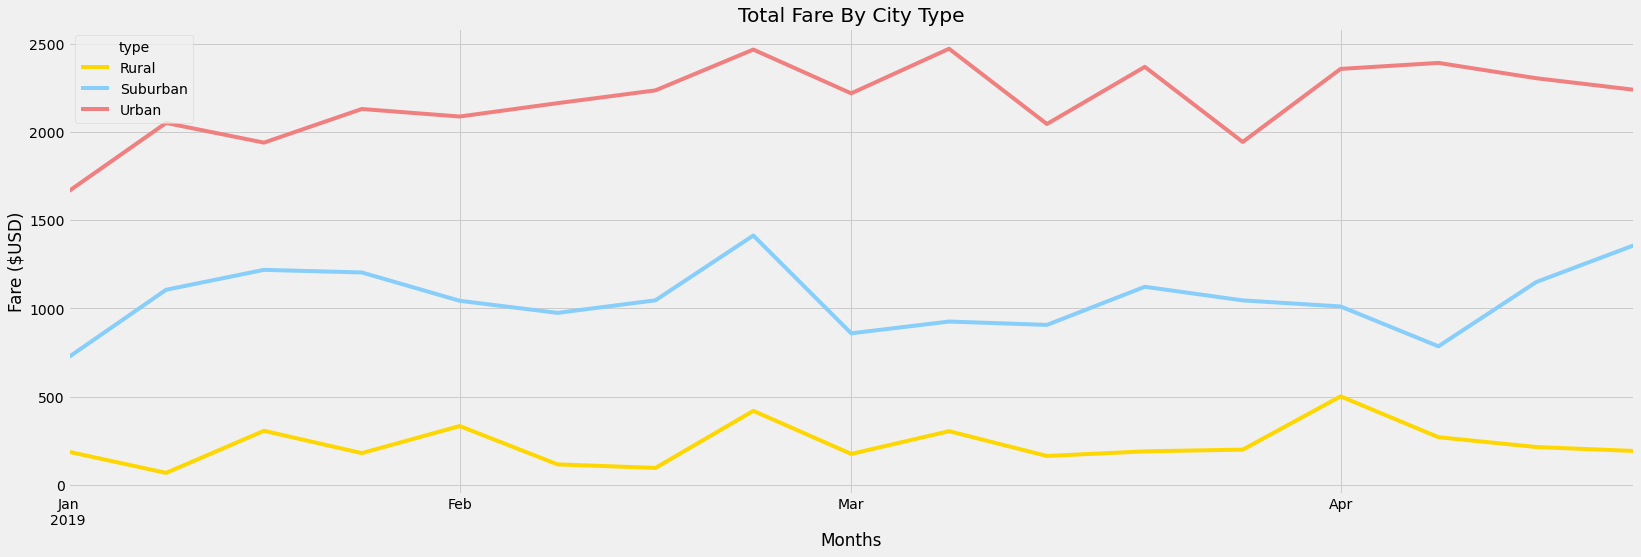

In [40]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
my_colors = ['gold', 'lightskyblue', 'lightcoral']
total_fare_by_date.plot(figsize= (25,8), color=my_colors)
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.title('Total Fare By City Type')
plt.ylabel("Fare ($USD)")
plt.xlabel("Months")

plt.savefig('analysis/PyBer_fare_summary.png', transparent=False, facecolor='w', bbox_inches='tight')

In [42]:
# Create a new DataFrame for average fare by date
average_fare_by_date = pyber_data_df.groupby(["type", "date"]).mean()["fare"]

# Reset the index of the DataFrame
average_fare_by_date = average_fare_by_date.reset_index()

# Create a pivot table with date as the index, the column as type, and values as fare
average_fare_by_date = average_fare_by_date.pivot(index = 'date', columns = 'type', values = 'fare')

# set the date index to datetime datatype, use loc method on the given dates, resample
average_fare_by_date = average_fare_by_date.loc["2019-01-01":"2019-04-29"]
average_fare_by_date.index = pd.to_datetime(average_fare_by_date.index)
average_fare_by_date = average_fare_by_date.resample('W').mean()

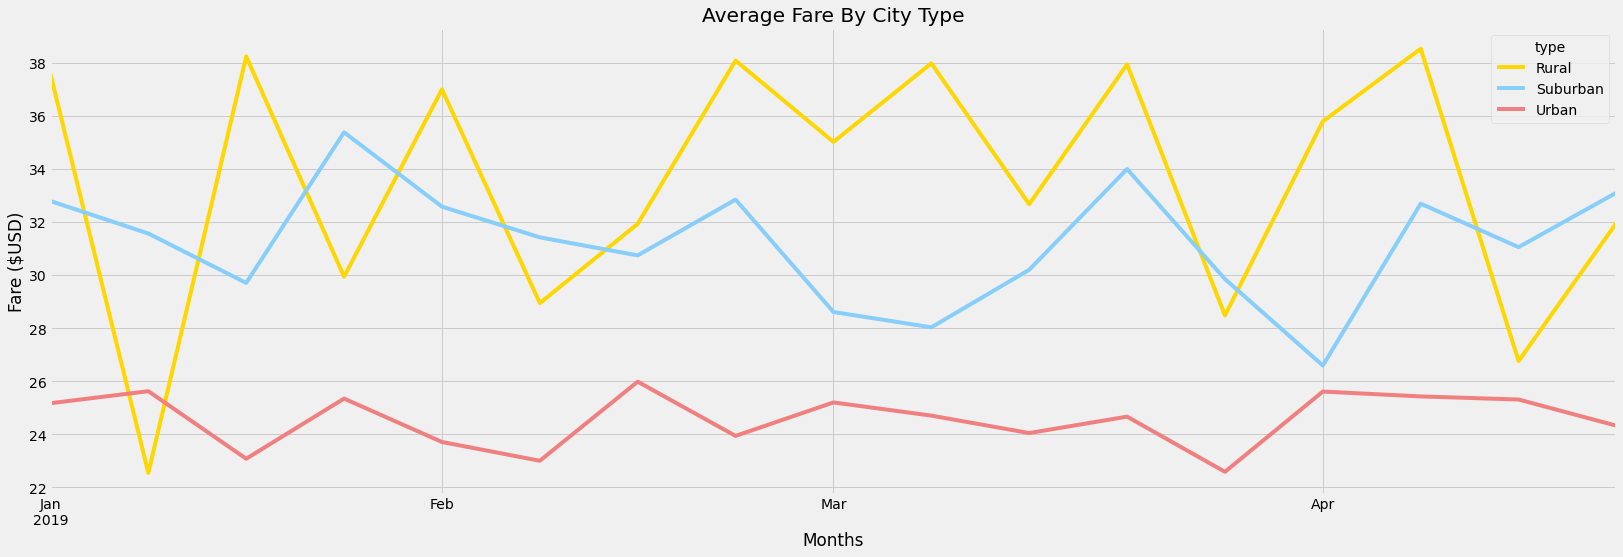

In [43]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
my_colors = ['gold', 'lightskyblue', 'lightcoral']
average_fare_by_date.plot(figsize= (25,8), color=my_colors)
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.title('Average Fare By City Type')
plt.ylabel("Fare ($USD)")
plt.xlabel("Months")

plt.savefig('analysis/PyBer_Avgfare_summary.png', transparent=False, facecolor='w', bbox_inches='tight')

In [49]:
# Create a new DataFrame for ride count by date
ride_count_by_date = pyber_data_df.groupby(["type", "date"]).count()

# Reset the index of the DataFrame
ride_count_by_date = ride_count_by_date.reset_index()

# Create a pivot table with date as the index, the column as type, and values as fare
ride_count_by_date = ride_count_by_date.pivot(index = 'date', columns = 'type', values = 'ride_id')

# set the date index to datetime datatype, use loc method on the given dates, resample
ride_count_by_date = ride_count_by_date.loc["2019-01-01":"2019-04-29"]
ride_count_by_date.index = pd.to_datetime(ride_count_by_date.index)
ride_count_by_date = ride_count_by_date.resample('W').sum()

type,Rural,Suburban,Urban
date,,,
2019-01-06,5.0,22.0,66.0
2019-01-13,3.0,35.0,80.0
2019-01-20,8.0,41.0,84.0
2019-01-27,6.0,34.0,84.0
2019-02-03,9.0,32.0,88.0
2019-02-10,4.0,31.0,94.0
2019-02-17,3.0,34.0,86.0
2019-02-24,11.0,43.0,103.0
2019-03-03,5.0,30.0,88.0


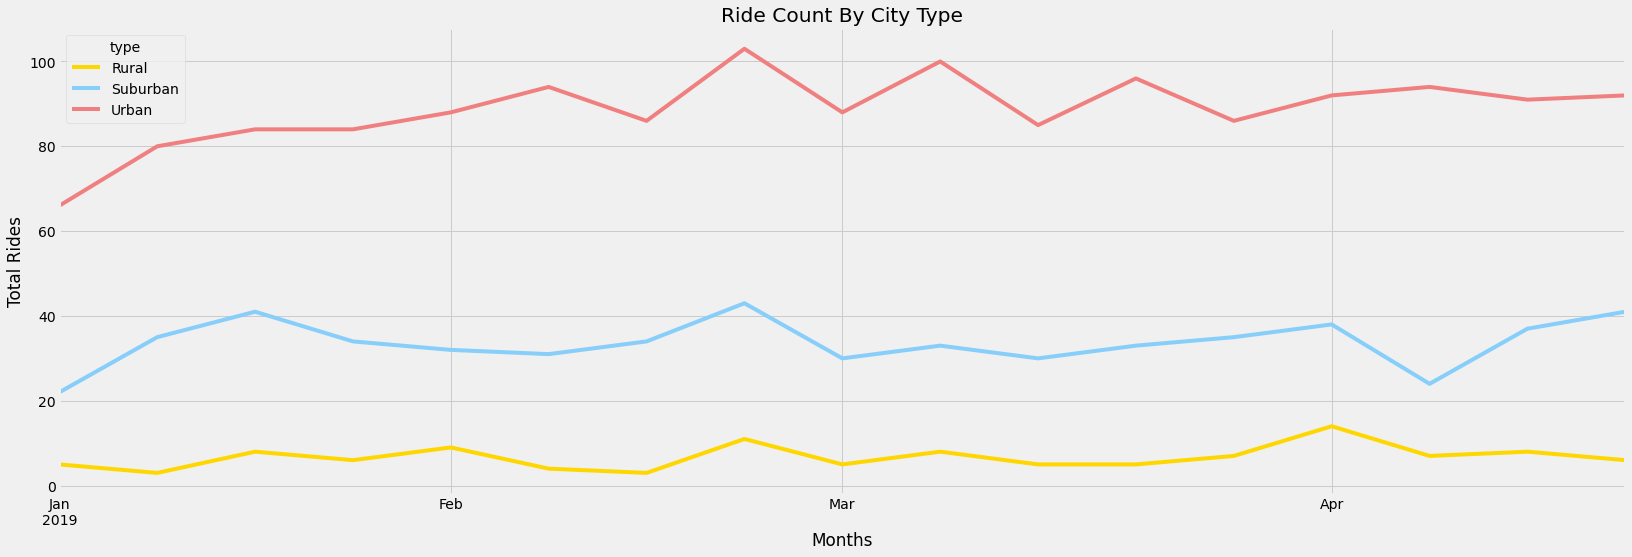

In [50]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
my_colors = ['gold', 'lightskyblue', 'lightcoral']
ride_count_by_date.plot(figsize= (25,8), color=my_colors)
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.title('Ride Count By City Type')
plt.ylabel("Total Rides")
plt.xlabel("Months")

plt.savefig('analysis/PyBer_RideCount_summary.png', transparent=False, facecolor='w', bbox_inches='tight')